### We use the module  forestci to compute the variance of the predictions and get a measure of the error in the predictions

In [2]:
import forestci as fci


/opt/anaconda3/lib/python3.9/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/opt/anaconda3/lib/python3.9/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


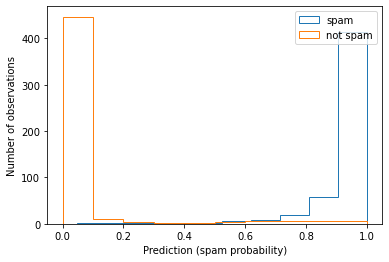

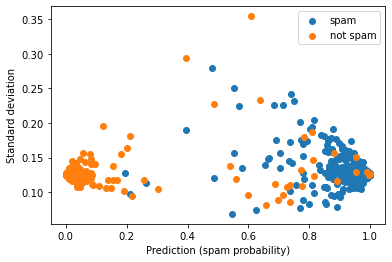

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import forestci as fci
from sklearn.datasets import make_classification

spam_X, spam_y = make_classification(5000)

# split the datainto training and test set
spam_X_train, spam_X_test, spam_y_train, spam_y_test = train_test_split(
                                                       spam_X, spam_y,
                                                       test_size=0.2)

# create RandomForestClassifier
n_trees = 500
spam_RFC = RandomForestClassifier(max_features=5, n_estimators=n_trees,
                                  random_state=42)
spam_RFC.fit(spam_X_train, spam_y_train)

spam_y_hat = spam_RFC.predict_proba(spam_X_test)

idx_spam = np.where(spam_y_test == 1)[0]
idx_ham = np.where(spam_y_test == 0)[0]

# Histogram predictions without error bars:
fig, ax = plt.subplots(1)
ax.hist(spam_y_hat[idx_spam, 1], histtype='step', label='spam')
ax.hist(spam_y_hat[idx_ham, 1], histtype='step', label='not spam')
ax.set_xlabel('Prediction (spam probability)')
ax.set_ylabel('Number of observations')
plt.legend()

# Calculate the variance
spam_V_IJ_unbiased = fci.random_forest_error(spam_RFC, spam_X_train,
                                             spam_X_test)

# Plot forest prediction for emails and standard deviation for estimates
# Blue points are spam emails; Green points are non-spam emails
fig, ax = plt.subplots(1)
ax.scatter(spam_y_hat[idx_spam, 1],
           np.sqrt(spam_V_IJ_unbiased[idx_spam]),
           label='spam')

ax.scatter(spam_y_hat[idx_ham, 1],
           np.sqrt(spam_V_IJ_unbiased[idx_ham]),
           label='not spam')

ax.set_xlabel('Prediction (spam probability)')
ax.set_ylabel('Standard deviation')
plt.legend()
plt.show()

In [2]:
import classifier as cl 
import pandas as pd
import ast 

path_commands = pd.read_csv("path.csv")
coordinates = pd.DataFrame()
#path_commands["path"][1]
for i in range(len(path_commands)):
    # path is located in path_commands['path'][i]
    id, class_, path = i,path_commands["stroke"][i], cl.get_coordinates(ast.literal_eval(path_commands["path"][i]))
    # append the coordinates to the dictionary as class_, path key, value pair
    coordinates[i] = [class_, path]
    
# get x, y value pairs from coordinates
x_coords = []
y_coords = []
for key, value in coordinates.items():
    for x, y in value[1]:
        x_coords.append(x)
        y_coords.append(y)




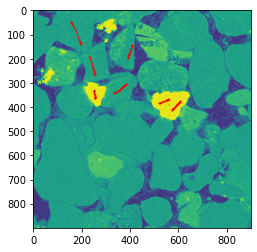

In [3]:
# load the img

from PIL import Image
img = Image.open("img.png")

plt.imshow(img)
plt.scatter(x_coords, y_coords, c='r', s=0.1)

In [4]:
# transpose coordinates
coordinates = coordinates.T
#coordinates
coordinates.columns = ["class", "path"]
# separate the values in the path column into individual rows 
coordinates = coordinates.explode("path")

# search the x,y coordinates given in the path column in the image and get the pixel values assigned to a new column "pixel_value"
coordinates["pixel_value"] = coordinates["path"].apply(lambda x: img.getpixel((x[0], x[1])))


classes = coordinates["class"].unique()
classes = list(classes)

# convert the classes in the class column to integers from the list classes to 0,1,...,n
coordinates["class"] = coordinates["class"].apply(lambda x: classes.index(x))

In [5]:
# split the path column into x and y coordinates
coordinates["x"] = coordinates["path"].apply(lambda x: x[0])
coordinates["y"] = coordinates["path"].apply(lambda x: x[1])
coordinates

,class,path,pixel_value,x,y
0,0,"[155.997, 47.997]",148,155.99700,47.99700
0,0,"[156.00257000000002, 48.002570000000006]",156,156.00257,48.00257
0,0,"[156.01808000000003, 48.01808000000001]",156,156.01808,48.01808
0,0,"[156.04353, 48.04353]",156,156.04353,48.04353
0,0,"[156.07891999999998, 48.07892]",156,156.07892,48.07892
...,...,...,...,...,...
6,1,"[572.845, 411.11]",247,572.84500,411.11000
6,1,"[572.72, 411.26000000000005]",247,572.72000,411.26000
6,1,"[572.605, 411.39]",247,572.60500,411.39000
6,1,"[572.5, 411.5]",247,572.50000,411.50000


In [6]:
# count values in the class column
coordinates["class"].value_counts()

0    278
1    236
Name: class, dtype: int64

In [7]:
dataset = coordinates[["pixel_value", "class"]]
dataset

,pixel_value,class
0,148,0
0,156,0
0,156,0
0,156,0
0,156,0
...,...,...
6,247,1
6,247,1
6,247,1
6,247,1


In [8]:
dataset = coordinates[["class", "pixel_value"]]

# train a model to predict the class of the pixel value
from sklearn.model_selection import train_test_split

X = dataset["pixel_value"]
y = dataset["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
# reshape the data to fit the model
rf.fit(X_train.values.reshape(-1, 1), y_train)
#rf.fit(X_train, y_train)

y_pred = rf.predict(X_test.values.reshape(-1, 1))

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

1.0

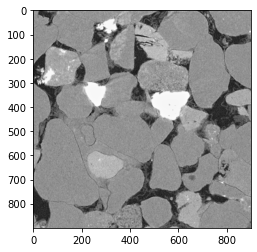

In [10]:
# use the model to predict the class of the pixel values in the image
img = Image.open("img.png")

plt.imshow(img, cmap="gray")

# get the pixel values from the image
pixel_values = []
for x in range(img.size[0]):
    for y in range(img.size[1]):
        pixel_values.append(img.getpixel((x, y)))

# reshape the pixel values to fit the model
pixel_values = np.array(pixel_values).reshape(-1, 1)

# predict the class of the pixel values
predictions = rf.predict(pixel_values)

# reshape the predictions to fit the image
# invert the predictions image

In [11]:
# Calculate the variance
#spam_V_IJ_unbiased = fci.random_forest_error(spam_RFC, spam_X_train,spam_X_test)
idx_0 = np.where(predictions == 0)[0]
idx_1 = np.where(predictions == 1)[0]


# Calculate the variance for the predictions
predictions_V_IJ_unbiased = fci.random_forest_error(rf, X_train.values.reshape(-1, 1), pixel_values)


std_dev_predictions = np.sqrt(predictions_V_IJ_unbiased)

# relative std dev 
std_dev_predictions = std_dev_predictions / np.mean(predictions)
std_dev_predictions = std_dev_predictions.reshape(img.size[1], img.size[0])


# rotate the predictions image 90 degrees
predictions = np.rot90(predictions.reshape(img.size[1], img.size[0]), 3)
# rotate the std dev image 90 degrees
std_dev_predictions = np.rot90(std_dev_predictions,3)
# reflect the predictions image
predictions = np.fliplr(predictions)
# reflect the std dev image
std_dev_predictions = np.fliplr(std_dev_predictions)
# fit the std dev predictions to 0-255 range
std_dev_predictions = (std_dev_predictions - np.min(std_dev_predictions)) / (np.max(std_dev_predictions) - np.min(std_dev_predictions)) * 255

/opt/anaconda3/lib/python3.9/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask


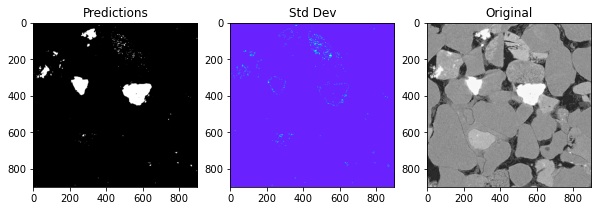

In [14]:

def graph_imgs(imgs, titles, colors=None):
    fig, ax = plt.subplots(1, len(imgs), figsize=(10,10))
    for i in range(len(imgs)):
        if colors is None:
            ax[i].imshow(imgs[i], cmap='gray')
        else:
            ax[i].imshow(imgs[i], cmap=colors[i])
        if titles:
            ax[i].set_title(titles[i])
    plt.show()



graph_imgs([predictions.reshape(img.size[1], img.size[0]),std_dev_predictions*255, img], ["Predictions", "Std Dev", "Original"], colors=["gray", "rainbow",  "gray"])

In [37]:
np.unique(std_dev_predictions)

array([ 47.00574892,  83.83795973, 123.69441311, 328.23370087,
       741.26891031, 762.61239314])

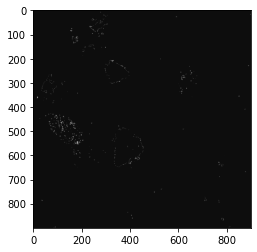

In [33]:
#plt.imshow(predictions, cmap="gray")
plt.imshow(std_dev_predictions, cmap="gray")

array([0.46964741, 0.46964741, 0.46964741, ..., 0.46964741, 0.46964741,
       0.46964741])